In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.utils import resample,shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import pydotplus as pdot

In [109]:
heartdf = pd.read_csv(r"C:\Term 3\Supervised learning with python\Codes-Data-Files\Machine Learning (Codes and Data Files)\Data\SAheart.csv")
heartdf

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,No
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,Si
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,No
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,No


In [110]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    object 
dtypes: float64(5), int64(3), object(2)
memory usage: 36.2+ KB


<Axes: xlabel='chd', ylabel='count'>

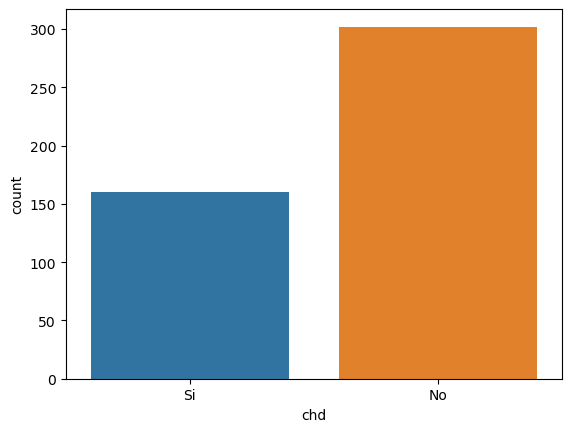

In [111]:
sn.countplot(x = 'chd',data=heartdf)

In [112]:
heartdf['chd'] = heartdf['chd'].apply(lambda x: 1 if x=='Si' else 0)
heartdf['famhist'] = heartdf['famhist'].apply(lambda x: 1 if x=='Si' else 0)

In [113]:
heartdf_chd_yes = heartdf[heartdf['chd'] == 1]
heart_chd_no  = heartdf[heartdf['chd'] == 0]

In [114]:
df_minority_upsampled = resample(heartdf_chd_yes, replace= True,n_samples = 300)

In [115]:
heartdfnew = pd.concat([df_minority_upsampled,heart_chd_no])

<Axes: xlabel='chd', ylabel='count'>

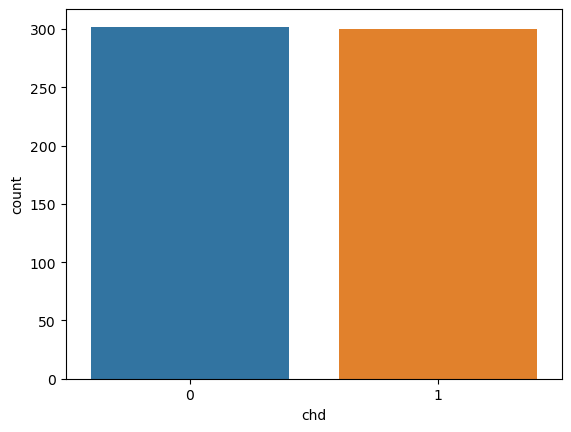

In [116]:
heartdfnew = shuffle(heartdfnew)
sn.countplot(x = 'chd',data=heartdfnew)

In [117]:
features = list(heartdf.columns)
features.remove('chd')

In [118]:
XOriginal = heartdf[features]
YOriginal = heartdf['chd']
X_trainoriginal,X_testoriginal,Y_trainoriginal,Y_testoriginal = train_test_split(XOriginal,YOriginal,test_size = 0.2, random_state=42)


In [119]:
XNew = heartdfnew[features]
YNew = heartdfnew['chd']
X_trainnew,X_testnew,Y_trainnew,Y_testnew = train_test_split(XNew,YNew,test_size = 0.2, random_state=42)


In [120]:
Y_testoriginal


225    0
30     1
39     1
222    0
124    0
      ..
22     0
358    0
46     1
168    0
347    0
Name: chd, Length: 93, dtype: int64

In [121]:
def draw_cm(actual,predicted):
    cm = metrics.confusion_matrix(actual,predicted)
    sn.heatmap(cm,annot=True,fmt = '.2f')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()
    

In [122]:
Y_trainoriginal.shape

(369,)

In [123]:

model = LogisticRegression()
kf  = KFold(n_splits = 5, shuffle=True, random_state = 42)
scores = cross_val_score(model,X_trainoriginal,Y_trainoriginal,cv=5)
print("Cross validation score ",scores.mean())


Cross validation score  0.7074046649389114


C:\Users\sarth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sarth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [124]:
model.fit(X_trainoriginal,Y_trainoriginal)
y_predoriginal = model.predict(X_testoriginal)

C:\Users\sarth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [125]:
y_predoriginal

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1], dtype=int64)

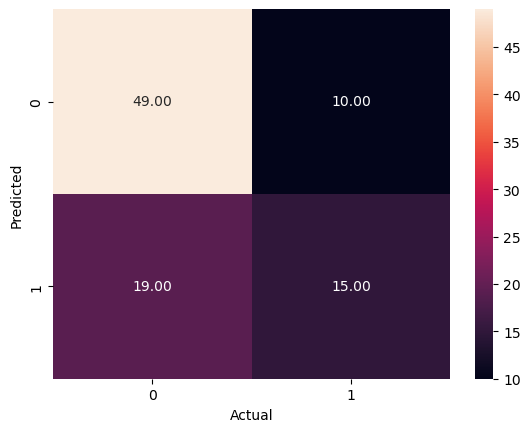

In [126]:
draw_cm(Y_testoriginal,y_predoriginal)

C:\Users\sarth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sarth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross validation score  0.6716065292096219


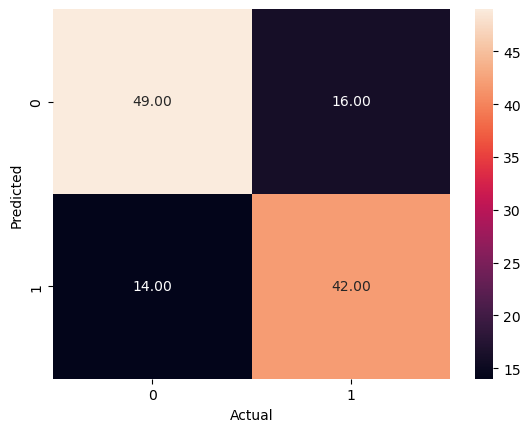

In [127]:
model = LogisticRegression()
kf  = KFold(n_splits = 5, shuffle=True, random_state = 42)
scores = cross_val_score(model,X_trainnew,Y_trainnew,cv=5)
print("Cross validation score ",scores.mean())
model.fit(X_trainnew,Y_trainnew)
y_prednew = model.predict(X_testnew)
draw_cm(Y_testnew,y_prednew)

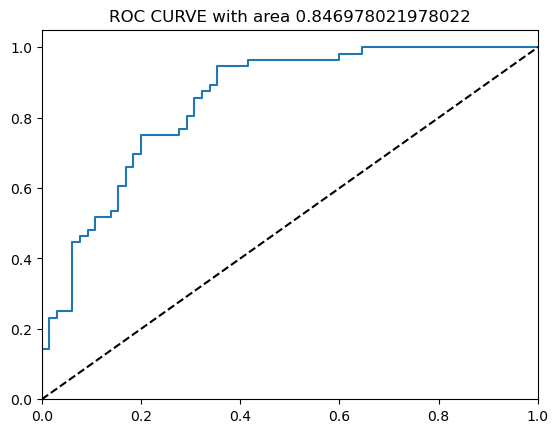

In [143]:
def draw_roc_curve(model,test_x,test_y):
    test_results_df = pd.DataFrame({'actual':test_y})
    test_results_df = test_results_df.reset_index()
    test_results_df['chd'] = pd.DataFrame(model.predict_proba(test_x)).iloc[:,1:2]
    fpr,tpr,threshold = metrics.roc_curve(test_results_df.actual,test_results_df.chd,drop_intermediate = False)
    auc_score = metrics.roc_auc_score(test_results_df.actual,test_results_df.chd)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.title(f"ROC CURVE with area {auc_score}")
    plt.show()
    
draw_roc_curve(model,X_testnew,Y_testnew)
    
    
    

In [147]:
tuned_parameters = [{'n_estimators':[50,100,200,400],'max_depth':[3,5,7,9],"max_features":[0.1,0.2,0.3,0.4,0.5]}]
clf = GridSearchCV(RandomForestClassifier(),tuned_parameters,cv=5,scoring = "roc_auc")
clf.fit(X_trainoriginal,Y_trainoriginal)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [3, 5, 7, 9],
                          'max_features': [0.1, 0.2, 0.3, 0.4, 0.5],
                          'n_estimators': [50, 100, 200, 400]}],
             scoring='roc_auc')

In [148]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.2, 'n_estimators': 50}

In [149]:
clf.best_score_

0.7309149659863946

In [150]:
best_model = RandomForestClassifier(n_estimators = 50,max_depth = 5,max_features=0.2)
best_model.fit(X_trainoriginal,Y_trainoriginal)

RandomForestClassifier(max_depth=5, max_features=0.2, n_estimators=50)

In [160]:
feature_importance_df = pd.DataFrame({"features":X_trainoriginal.columns,"Importance":best_model.feature_importances_}).sort_values("Importance",ascending = False)
feature_importance_df["cum_sum"] = feature_importance_df["Importance"].cumsum()*100
feature_importance_df

,features,Importance,cum_sum
8,age,0.176170,17.616992
2,ldl,0.152924,32.909428
3,adiposity,0.125940,45.503381
1,tobacco,0.125098,58.013204
6,obesity,0.122266,70.239832
0,sbp,0.121135,82.353336
5,typea,0.107065,93.059843
7,alcohol,0.069402,100.000000
4,famhist,0.000000,100.000000


<Axes: xlabel='Importance', ylabel='features'>

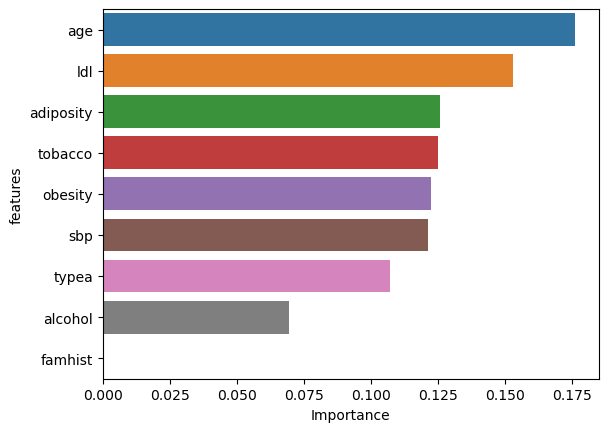

In [162]:
sn.barplot(y = "features",x = "Importance",data = feature_importance_df)